# Лабораторная работа № 7

## Вариант №19
### Решить методом Тейлора 4-го порядка Задачу Коши; $$9y''+18y'+27y=exp(-3x)$$ $$y(0)=1, y'(0)=0$$ $$x\in[0-2]$$
### с заданной относительной точностью 0.01



## Теоретическая справка по методу  Тейлора 4-го порядка:
### Простейшим способом построения приближенного решения в точке $x_{n+1}$ сетки является способ, основанный на разложении решения в ряд Тейлора в предыдущей точке сетки $x_n$ по степеням шага h:
### Взяв вместо  ряда конечный его отрезок : $$p(x; y; h)= y_0(x) +h^2y''(x) + : : : +(h^{p-1}/p!)y^{p}(x)$$
### Так как предлогается решить методом Тейлора 4-го порядка, то нам необходимо разложить до третей производной включительно.

In [35]:
import numpy as np
from math import log,sin,cos,exp,sqrt
from scipy import *
from scipy.linalg import *
from sympy import *
init_printing()
import matplotlib.pyplot as plt
import pylab

#### Переходим от дифференциального уравнения второго порядка к системе дифференциальных уравнений первого порядка

In [36]:
def fm(x,y1,y2):
    z=y2
    r=-2*y2-3*y1+(1/9)*exp(-3*x)
    return z,r
x=Symbol('x')
y1=Symbol('y1')
y2=Symbol('y2')

####  Метод Тейлора 4-го порядка для решения дифференциального уравнения второго порядка

In [37]:
def F(f,x00,y0,y01,h):
    n=0
    p1=np.zeros([2,1])
    A=np.zeros([2,1])
    while True:
        x0=x00
        p0=np.array([[y0],[y01]])
        n=n+1
        X=[x0]
        Y=[y0]
        Y1=[y01]
        S=[x00]
        j=1
        while x0>=0 and x0<=(2-h):
            b=diff(f(x,y1,y2)[0],y1).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
            z=diff(f(x,y1,y2)[0],y2).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
            d=diff(f(x,y1,y2)[1],y1).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
            q=diff(f(x,y1,y2)[1],y2).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
            A[1][0]=diff(f(x,y1,y2)[1],x).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
            B=np.array([[b,z],[d,q]])
            for i in range(2):
                e=f(x,y1,y2)[i].evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
                p1[i]=e
            p2=A+dot(B,p1)    
            pn=p0+h*p1+0.5*p2*h**2
            p0=pn
            x0=x0+h
            X.append(x0)
            Y.append(pn[0][0])
            Y1.append(pn[1][0])
            j=j+1
            if j%2!=0:
                S.append(pn[0][0])
                
        h=h*0.5    
        S=np.array(S,dtype=np.double)
        if n!=1:
            Yp= np.array(Yp,dtype=np.double)
            if abs (max(S-Yp))<0.01 or n==20:
                print(n)
                break
        Yp=Y
    return X,Y,Y1
C,D,E=F(fm,0,1,0,1)

5


#### График решения полученного аналитически и численно 

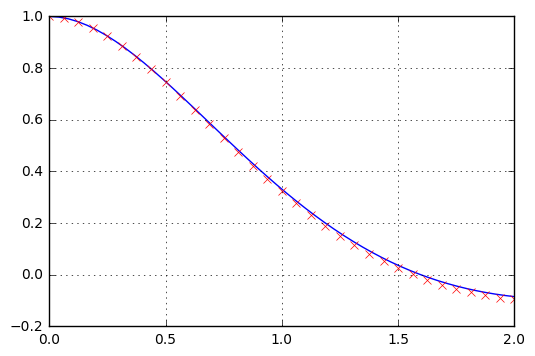

In [38]:
def Fx(x):
    z=(1/18)*exp(-x)*(9*sqrt(2)*sin(sqrt(2)*x)+17*cos(sqrt(2)*x)+1)
    return z               
xnew=np.linspace(0,2,50)
ynew=[Fx(i) for i in xnew]
plt.plot(xnew,ynew,C,D,'rx')
plt.grid(True)
plt.show()

####  Фазовая плоскость

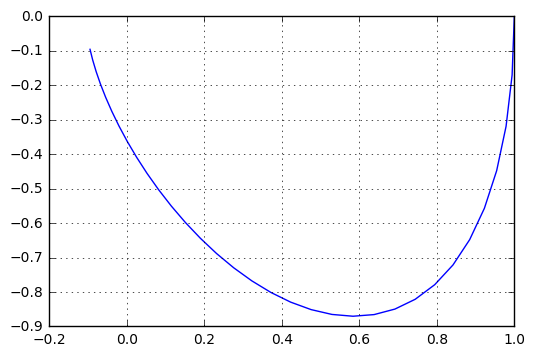

In [39]:
plt.plot(D,E)
plt.grid(True)
plt.show()

### Вывод : данная программа может реализовать метод Тейлора 4-го порядка для дифференциальных уравнений 2-го порядка и задачи Коши. При сравнение решений аналитического и численного присутствует небольшое отклонение, это связано с неточностью констант в найденном нами аналитическом решение. Фазовая плокость соответствует результатам.

## Работу выполнил студент 431гр. Широков Алексей